In [ ]:
# import libraries
import pandas as pd
import numpy as np

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector

# modeling
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# visualization and evaluation
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# lets load our data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/week 12/house_prices dojo_1/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Cleaning!

In [ ]:
# get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# check missing values
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

from above informations not clear visable!

In [ ]:
# lets loop and print only missing values with column name
missing_values = df.isna().sum()

for i, values in missing_values.items():
    if values != 0:
        print(f"{i} missing {values} values")

LotFrontage missing 259 values
Alley missing 1369 values
MasVnrType missing 8 values
MasVnrArea missing 8 values
BsmtQual missing 37 values
BsmtCond missing 37 values
BsmtExposure missing 38 values
BsmtFinType1 missing 37 values
BsmtFinType2 missing 38 values
Electrical missing 1 values
FireplaceQu missing 690 values
GarageType missing 81 values
GarageYrBlt missing 81 values
GarageFinish missing 81 values
GarageQual missing 81 values
GarageCond missing 81 values
PoolQC missing 1453 values
Fence missing 1179 values
MiscFeature missing 1406 values


In [ ]:
# lets check for dublicats
df.duplicated().sum()

0

In [ ]:
# lets split our data into X and y
# from our data we have "Id" collumn which is not necessary for our model so lets drop that column too!
X = df.drop(columns=['Id', 'SalePrice'])
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [ ]:
# lets check info
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

##Required Task:

  ### 1.Be sure to perform a train test split on the train.csv so you can evaluate your models.

In [ ]:
# lets create preprocessor
# lets work with categorical
cat_columns = make_column_selector(dtype_include='object')
constant_imputer = SimpleImputer(strategy='constant', fill_value="missing_values")
ohe = OneHotEncoder(handle_unknown='ignore',sparse = False)
cat_pipe = make_pipeline(constant_imputer, ohe)
cat_tuple = (cat_pipe, cat_columns)

# now lets work with numerical
num_columns = make_column_selector(dtype_include='number')
median_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
num_pipe = make_pipeline(median_imputer, scaler)
num_tuple = (num_pipe, num_columns)


preprocessor  = make_column_transformer(cat_tuple, num_tuple, remainder='drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing_values',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f479043ead0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f47984e9780>)])

In [ ]:
# fit and transform
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# get shape
X_train_proc.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(1095, 300)

### 2.Create and evaluate 3 iterations of a deep learning model to predict housing prices using the techniques you have learned to optimize your model's performance. Be sure to include some form of regularization with at least one model.

#### Model 1

In [ ]:
# create model architecture
input_shape = X_train_proc.shape[1]

model_1 = Sequential()

model_1.add(Dense(input_shape, input_dim = input_shape, activation = 'relu'))

model_1.add(Dense((input_shape*0.75), activation='relu'))

model_1.add(Dense((input_shape*0.5), activation='relu'))

model_1.add(Dense((input_shape*0.25), activation='relu'))

# output layer
model_1.add(Dense(1, activation ='linear'))

model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 300)               90300     
                                                                 
 dense_37 (Dense)            (None, 225)               67725     
                                                                 
 dense_38 (Dense)            (None, 150)               33900     
                                                                 
 dense_39 (Dense)            (None, 75)                11325     
                                                                 
 dense_40 (Dense)            (None, 1)                 76        
                                                                 
Total params: 203,326
Trainable params: 203,326
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile model with additional metrics
model_1.compile(loss="mse", optimizer='adam', metrics=[metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])

In [ ]:
# lets fit to our model
history = model_1.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=100,
                        verbose=0)

In [ ]:
# custom function for plotting history
def plot_history(history):

  metrics = history.history.keys()

  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

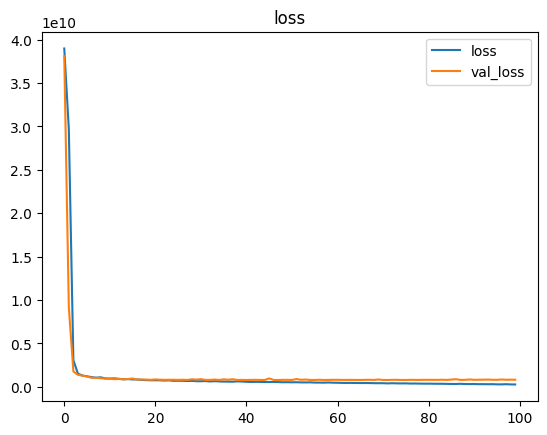

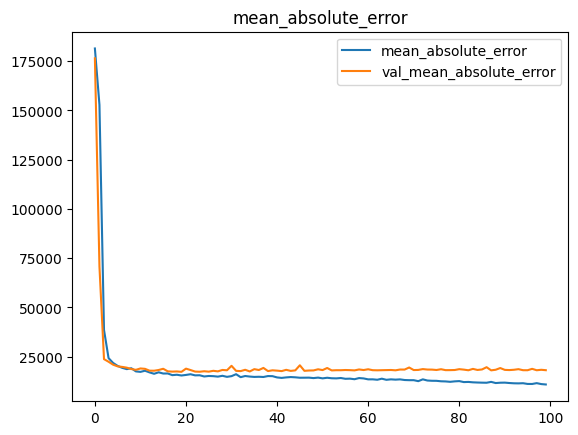

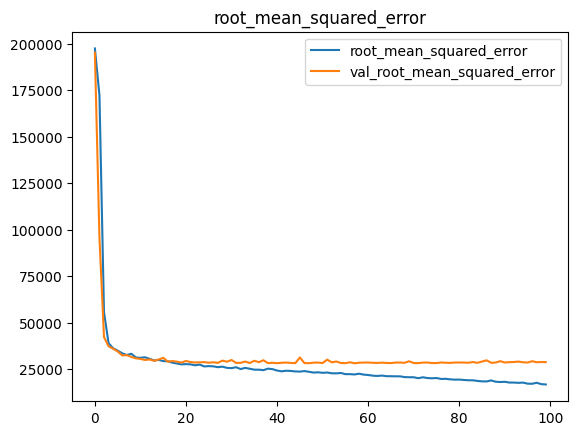

In [ ]:
# lets plot
plot_history(history)

In [ ]:
# evaluate model
y_pred = model_1.predict(X_test_proc)

print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

12/12 [==============================] - 0s 3ms/step
final RMSE: 28783.040812423595
final MAE: 18145.9140625
final R2: 0.8817377745621389


#### Model 2

In [ ]:
# now lets create model #2
model_2 = Sequential()

# first layer
model_2.add(Dense(input_shape, input_dim = input_shape, activation = 'relu'))

model_2.add(Dense((input_shape * 0.75), activation = 'relu'))

model_2.add(Dense((input_shape * 0.5),activation = 'relu'))

model_2.add(Dense((input_shape * 0.25), activation = 'relu'))

model_2.add(Dropout(0.2))

# output layer
model_2.add(Dense(1, activation = 'linear'))

# check
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 300)               90300     
                                                                 
 dense_42 (Dense)            (None, 225)               67725     
                                                                 
 dense_43 (Dense)            (None, 150)               33900     
                                                                 
 dense_44 (Dense)            (None, 75)                11325     
                                                                 
 dropout_2 (Dropout)         (None, 75)                0         
                                                                 
 dense_45 (Dense)            (None, 1)                 76        
                                                                 
Total params: 203,326
Trainable params: 203,326
Non-tr

In [ ]:
model_2.compile(loss = 'mse',
              optimizer = 'adam',
              metrics = [metrics.MeanAbsoluteError(),
                        metrics.RootMeanSquaredError()])

In [ ]:
# fit model and save learning history
history2 = model_2.fit(X_train_proc, y_train,
                    validation_data = (X_test_proc, y_test),
                    epochs = 100,
                    verbose = 0)

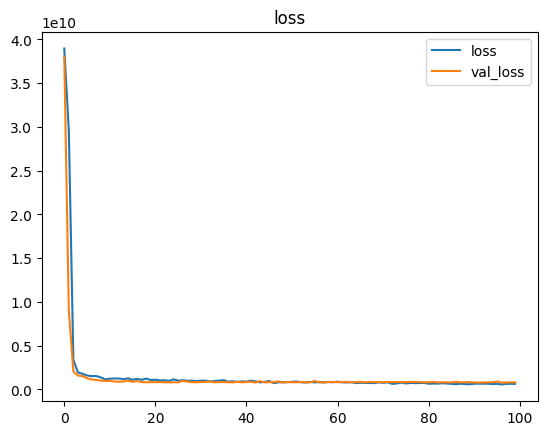

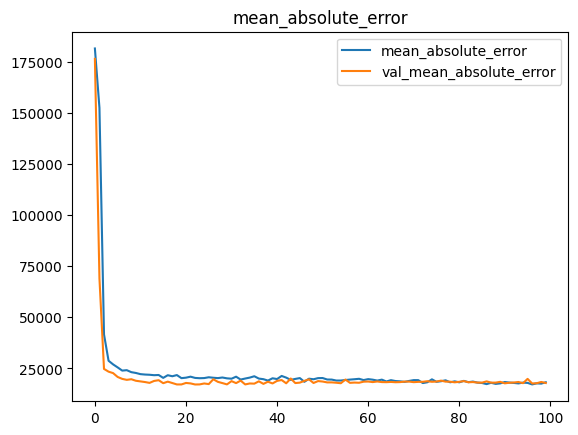

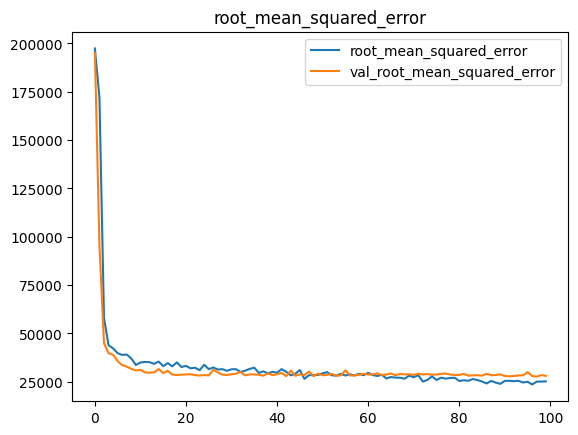

In [ ]:
# plot learning history
plot_history(history2)

In [ ]:
# evaluate model
y_pred = model_2.predict(X_test_proc)

print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

12/12 [==============================] - 0s 3ms/step
final RMSE: 28099.598613449027
final MAE: 17871.708636558218
final R2: 0.8872872793566081


#### Model 3



In [ ]:
model_3 = Sequential()


model_3.add(Dense(input_shape, input_dim = input_shape, activation = 'relu'))

model_3.add(Dense((input_shape * 0.9), activation = 'relu'))

model_3.add(Dense((input_shape * 0.8), activation = 'relu'))

model_3.add(Dense((input_shape * 0.7), activation = 'relu'))

model_3.add(Dense((input_shape * 0.6), activation = 'relu'))

model_3.add(Dense((input_shape * 0.5), activation = 'relu'))

model_3.add(Dense((input_shape * 0.4), activation = 'relu'))

model_3.add(Dense((input_shape * 0.3), activation = 'relu'))

model_3.add(Dense((input_shape * 0.2), activation = 'relu'))

model_3.add(Dense((input_shape * 0.1), activation = 'relu'))

model_3.add(Dropout(0.2))

# output layer
model_3.add(Dense(1,
                 activation = 'linear'))

# check
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 300)               90300     
                                                                 
 dense_47 (Dense)            (None, 270)               81270     
                                                                 
 dense_48 (Dense)            (None, 240)               65040     
                                                                 
 dense_49 (Dense)            (None, 210)               50610     
                                                                 
 dense_50 (Dense)            (None, 180)               37980     
                                                                 
 dense_51 (Dense)            (None, 150)               27150     
                                                                 
 dense_52 (Dense)            (None, 120)             

In [ ]:
# compile model, add additional metrics
model_3.compile(loss = 'mse',
              optimizer = 'adam',
              metrics = [metrics.MeanAbsoluteError(),
                        metrics.RootMeanSquaredError()])

In [ ]:
# fit model and save learning history
history3 = model_3.fit(X_train_proc, y_train,
                    validation_data = (X_test_proc, y_test),
                    epochs = 100,
                    verbose = 0)

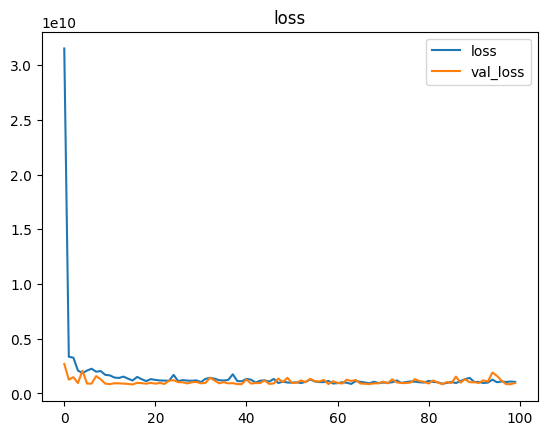

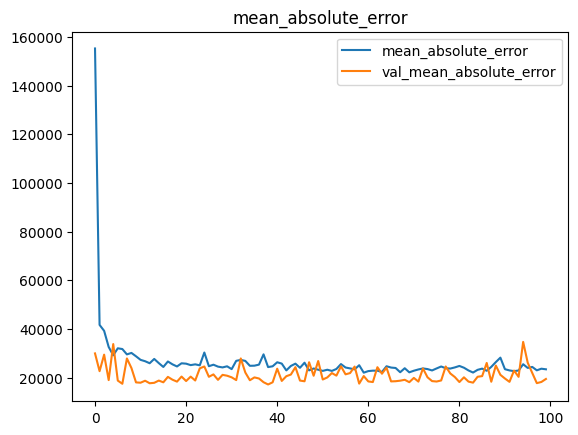

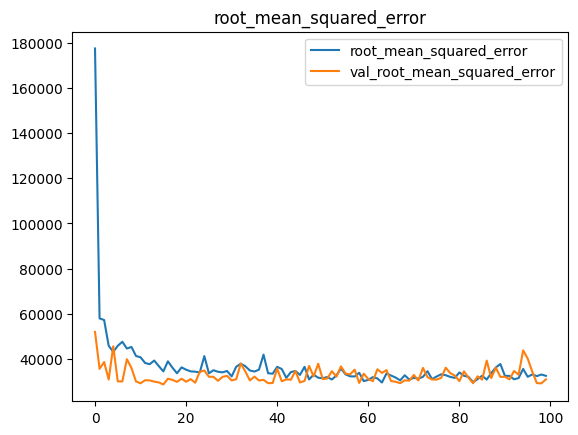

In [ ]:
# plot learning history
plot_history(history3)

In [ ]:
# evaluate model
y_pred = model_3.predict(X_test_proc)

print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')


12/12 [==============================] - 0s 3ms/step
final RMSE: 30832.155076381463
final MAE: 19464.017797517125
final R2: 0.8642998075385997


### 3.Select your best model!

My best model is Model 2. This model gave us best score in R2 (0.883915643741786) by droping 25% from original number of features.